In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [6]:
data = pd.read_csv('FB.csv')

In [8]:
print (data.head())

   Unnamed: 0 symbol        date      open      high       low     close  \
0           0     FB  2012-05-18  0.020657  0.021838  0.018921  0.018783   
1           1     FB  2012-05-21  0.017945  0.017791  0.016432  0.016720   
2           2     FB  2012-05-22  0.016020  0.016301  0.015406  0.015231   
3           3     FB  2012-05-23  0.015411  0.015772  0.015615  0.015722   
4           4     FB  2012-05-24  0.016187  0.016116  0.015819  0.016228   

      volume  adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  573576400   0.018783       0.000000          38.230000           0.000000   
1  168192700   0.016720      -4.200001          36.129999           2.100000   
2  101786600   0.015231      -3.029999          34.419999           3.419999   
3   73600000   0.015722       1.000000          33.814999           1.814999   
4   50237200   0.016228       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_cl

In [12]:
print (data.dtypes)

Unnamed: 0               int64
symbol                  object
date                    object
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
adj_close              float64
prev_day_diff          float64
50_day_moving_avg      float64
10_day_volatility      float64
s&p_index_open         float64
s&p_index_high         float64
s&p_index_low          float64
s&p_index_close        float64
s&p_index_volume       float64
s&p_index_adj_close    float64
dtype: object


In [13]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [23]:
print (data.head())

   Unnamed: 0 symbol        date      open      high       low     close  \
0           0     FB  2012-05-18  0.020657  0.021838  0.018921  0.018783   
1           1     FB  2012-05-21  0.017945  0.017791  0.016432  0.016720   
2           2     FB  2012-05-22  0.016020  0.016301  0.015406  0.015231   
3           3     FB  2012-05-23  0.015411  0.015772  0.015615  0.015722   
4           4     FB  2012-05-24  0.016187  0.016116  0.015819  0.016228   

      volume  adj_close  prev_day_diff  50_day_moving_avg  10_day_volatility  \
0  573576400   0.018783       0.000000          38.230000           0.000000   
1  168192700   0.016720      -4.200001          36.129999           2.100000   
2  101786600   0.015231      -3.029999          34.419999           3.419999   
3   73600000   0.015722       1.000000          33.814999           1.814999   
4   50237200   0.016228       1.029999          33.657999           0.628000   

   s&p_index_open  s&p_index_high  s&p_index_low  s&p_index_cl

In [24]:
data.index

RangeIndex(start=0, stop=956, step=1)

In [25]:
ts = data['adj_close']

In [26]:
ts.head(10)

0    0.018783
1    0.016720
2    0.015231
3    0.015722
4    0.016228
5    0.015678
6    0.014170
7    0.013850
8    0.014543
9    0.013619
Name: adj_close, dtype: float64

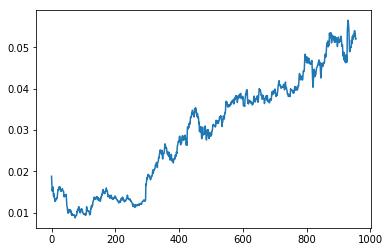

In [30]:
plt.plot(ts)

In [33]:

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    rolmean = pd.rolling_mean(timeseries, window=20)
    rolstd = pd.rolling_std(timeseries, window=20)

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['open','high','10_day_volatility', '50_day_moving_avg'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

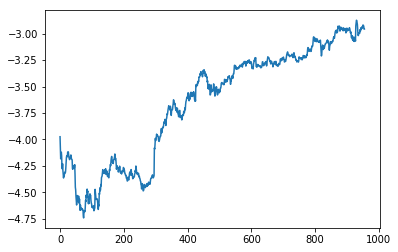

In [35]:
ts_log = np.log(ts)
plt.plot(ts_log)